In [1]:
import fastai, pathlib

In [2]:
import fastai.vision as vision

In [3]:
image_paths = pathlib.Path('../data/images')

In [4]:
image_list = vision.ImageList.from_folder(image_paths)

In [5]:
image_list.items[0]

WindowsPath('../data/images/alangesoehne-1476-23500.jpg')

In [6]:
data = (
    vision.ImageList.from_folder(image_paths)
    .split_by_rand_pct()
    .label_from_re(r'.*\/.+-.+-(.*).jpg', label_cls=vision.FloatList)
    .databunch()
    .normalize(vision.imagenet_stats)
)

In [7]:
data

ImageDataBunch;

Train: LabelList (4814 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
33582.0,34750.0,21950.0,14999.0,16995.0
Path: ..\data\images;

Valid: LabelList (1203 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
7200.0,12450.0,57900.0,62500.0,4450.0
Path: ..\data\images;

Test: None

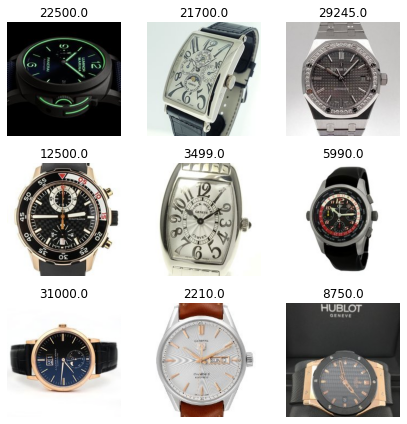

In [9]:
data.show_batch(3, figsize=(6,6))

In [21]:
learn = vision.cnn_learner(data, vision.models.resnet34, metrics=vision.error_rate)

In [22]:
learn.loss_func = vision.MSELossFlat()

In [23]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,4200671744.000000,1147571072.000000,1.000000,00:45
1,3037722624.000000,1147353472.000000,1.000000,00:45
2,3387394048.000000,1146356992.000000,1.000000,00:45
3,2974695936.000000,1144542336.000000,1.000000,00:46
4,4591238656.000000,1140583296.000000,1.000000,00:49
5,2198457856.000000,1129952768.000000,1.000000,00:47
6,4058892288.000000,1125341696.000000,1.000000,00:46
7,3899045632.000000,1113093248.000000,1.000000,00:42
8,3499321088.000000,1094917504.000000,1.000000,00:44
9,2856279552.000000,1083540608.000000,1.000000,00:43


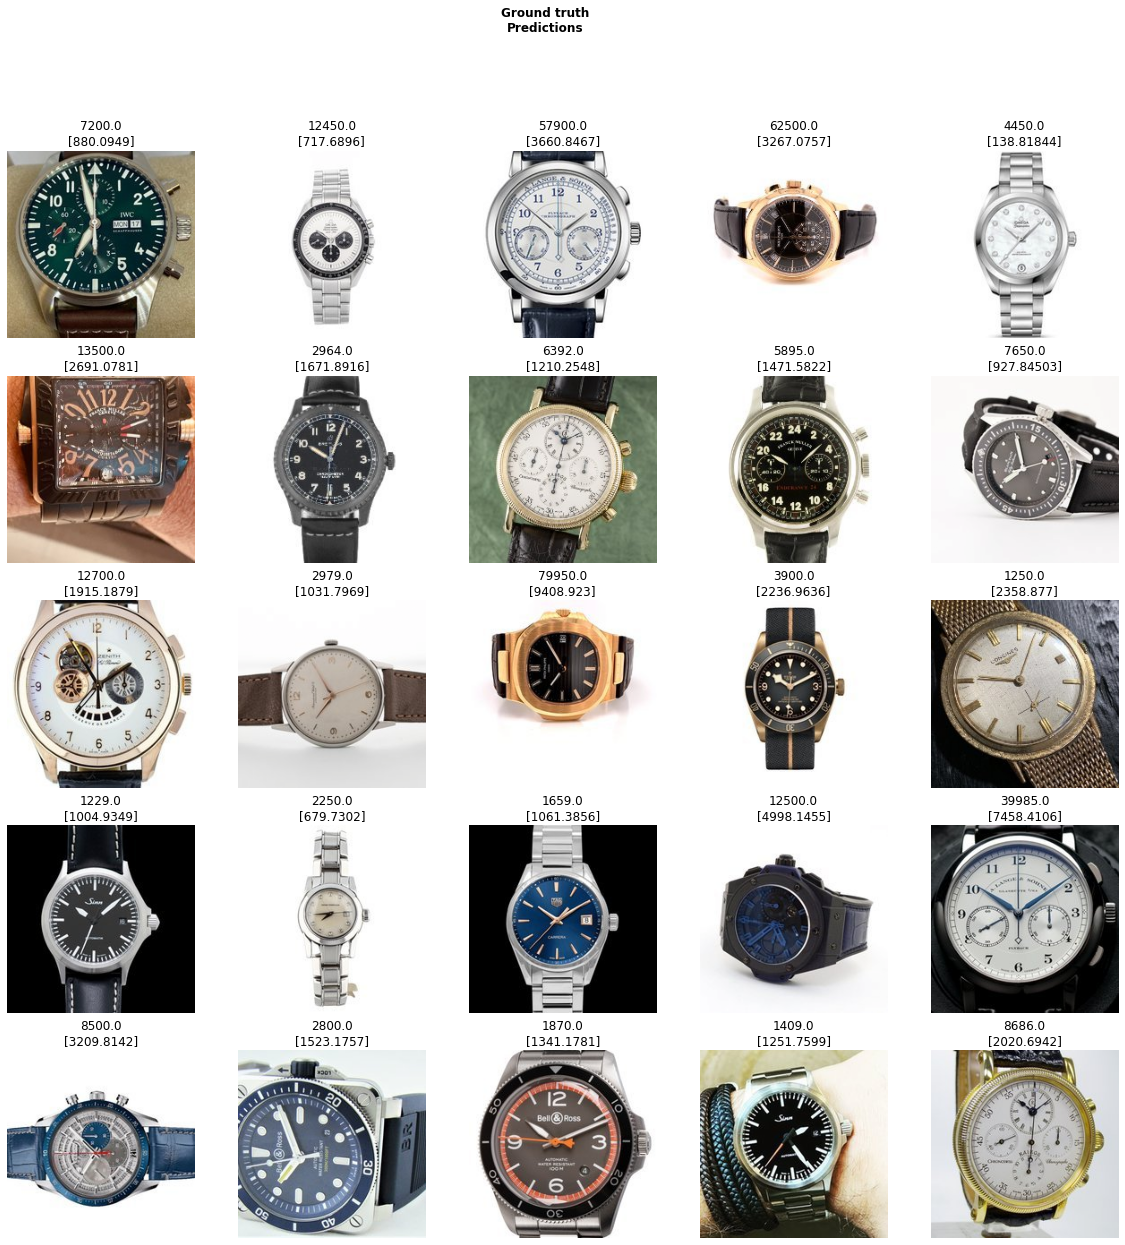

In [24]:
learn.show_results()

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


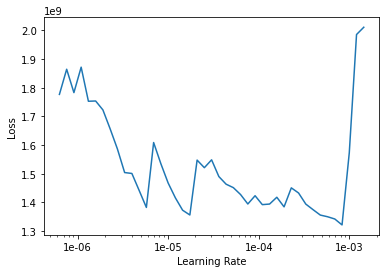

In [37]:
learn.recorder.plot()

In [38]:
learn.save('stage-1')

In [39]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(20, max_lr=slice(1e-3,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,2268017920.000000,1047353216.000000,1.000000,00:49
1,3335356672.000000,1045354880.000000,1.000000,00:50
2,3266868480.000000,1103725824.000000,1.000000,00:50
3,2610348032.000000,1084861952.000000,1.000000,00:53
4,2477705472.000000,1020532672.000000,1.000000,00:54
5,3594020352.000000,1099101440.000000,1.000000,00:51
6,3767646720.000000,1063953344.000000,1.000000,00:55
7,3985393152.000000,1061687808.000000,1.000000,00:54
8,3356581888.000000,1041141824.000000,1.000000,00:53
9,2676499456.000000,1040250496.000000,1.000000,00:55


In [41]:
learn.fit_one_cycle(40, max_lr=slice(5e-3,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,3714499584.000000,1057731776.000000,1.000000,00:50
1,3417444608.000000,1060962048.000000,1.000000,00:50
2,3890842112.000000,1060861568.000000,1.000000,00:55
3,3757107968.000000,1060627456.000000,1.000000,00:54
4,3798209024.000000,1087618688.000000,1.000000,00:49
5,3463910144.000000,1090617600.000000,1.000000,00:50
6,3643440384.000000,1094744960.000000,1.000000,00:50
7,4332185600.000000,1117356288.000000,1.000000,00:50
8,3542249472.000000,1034296768.000000,1.000000,00:52
9,3638074624.000000,1066553984.000000,1.000000,00:50


In [42]:
learn.fit_one_cycle(10, max_lr=slice(8e-3,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,3800241152.000000,1061439168.000000,1.000000,00:49
1,3042713344.000000,1094376832.000000,1.000000,00:49
2,2561983488.000000,1074890112.000000,1.000000,00:48
3,3211789568.000000,1026464576.000000,1.000000,00:48
4,4292682240.000000,1085259776.000000,1.000000,00:51
5,4476254720.000000,1085509888.000000,1.000000,00:53
6,3320938752.000000,1063706688.000000,1.000000,00:50
7,3900376320.000000,1071448448.000000,1.000000,00:49
8,3388019968.000000,1058028224.000000,1.000000,00:50
9,2668673792.000000,1055079616.000000,1.000000,00:50


In [43]:
learn.fit_one_cycle(10, max_lr=slice(8e-4,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,4328251392.000000,1069456512.000000,1.000000,00:49
1,4359713280.000000,1066221056.000000,1.000000,00:51
2,4103935232.000000,1066911040.000000,1.000000,00:50
3,4464754176.000000,1064173120.000000,1.000000,00:50
4,3181949952.000000,1066267776.000000,1.000000,00:52
5,4261363200.000000,1069319360.000000,1.000000,00:51
6,3038528512.000000,1062295936.000000,1.000000,00:50
7,3975269120.000000,1067393408.000000,1.000000,00:51
8,2921239296.000000,1064992128.000000,1.000000,00:52
9,4616064512.000000,1076270592.000000,1.000000,00:50


In [44]:
learn.fit_one_cycle(20, max_lr=slice(8e-4,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,4960353280.000000,1074062336.000000,1.000000,00:49
1,2987415552.000000,1070390592.000000,1.000000,00:49
2,3599353344.000000,1065411520.000000,1.000000,00:49
3,3345098752.000000,1068157888.000000,1.000000,00:53
4,2528965888.000000,1049263808.000000,1.000000,00:52
5,4359347712.000000,1074489856.000000,1.000000,00:50
6,3603857152.000000,1066723072.000000,1.000000,00:49
7,4579599360.000000,1082702720.000000,1.000000,00:49
8,3872018688.000000,1061083392.000000,1.000000,00:49
9,3415161088.000000,1067404800.000000,1.000000,00:50


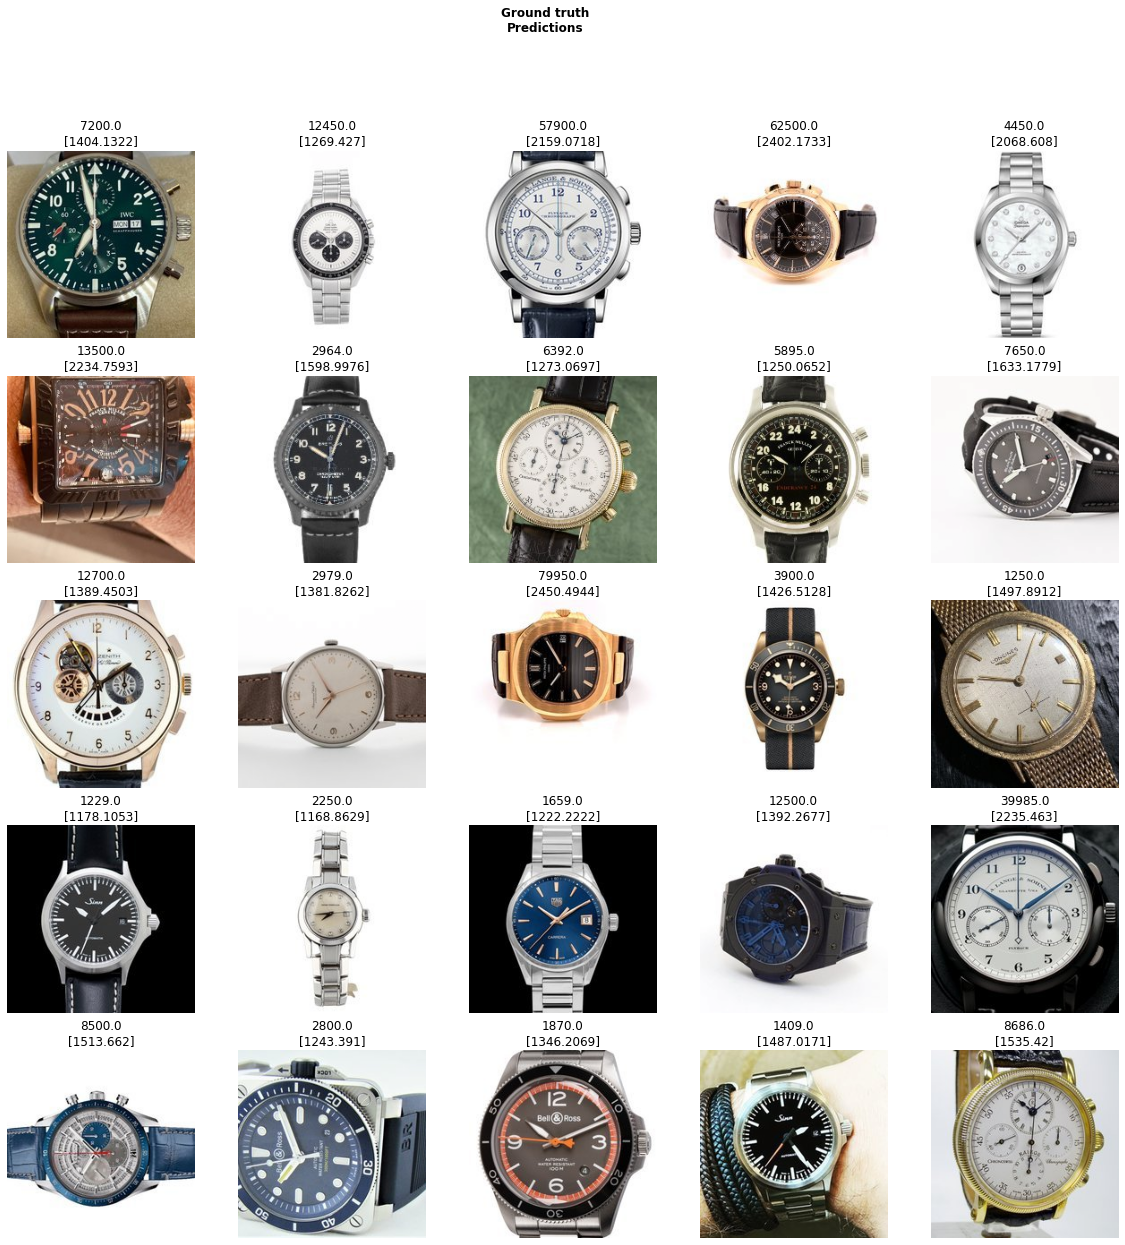

In [45]:
learn.show_results()

In [46]:
learn.save("stage-2")

In [48]:
learn.export("../pkls/regression.pkl")